In [ ]:
import glob
import numpy as np
from PIL import Image
import random

files = glob.glob("train/*")[:500]
size = int(4752*0.25), int(3168*0.25)

for i in files:
    im = Image.open(i)
    im_resized = im.resize(size, Image.ANTIALIAS)
    dest = 'dest/'+i.split("/")[1]
    im_resized.save(dest, "JPEG")

In [ ]:
import matplotlib.image as mpimg
import glob

files = glob.glob("dest/*")[:50]

flattened = []
flattened_r = []
flattened_g = []
flattened_b = []
for i in files:
    np_image = mpimg.imread(i)
    np_image_r = []
    np_image_g = []
    np_image_b = []

    for i in np_image:
        for j in i:
            np_image_r.append(j[0])
            np_image_g.append(j[1])
            np_image_b.append(j[2])
            
#     np_image_r = np_image.copy()
#     np_image_g = np_image.copy()
#     np_image_b = np_image.copy()
    
#     np_image_r[:,:,[1,2]] = 0
#     np_image_g[:,:,[0,2]] = 0
#     np_image_b[:,:,[0,1]] = 0
    
    flattened.append(np_image.flatten())
    
    flattened_r.append(np_image_r)
    flattened_g.append(np_image_g)
    flattened_b.append(np_image_b)
    
#     flattened_r.append(np_image_r.flatten())
#     flattened_g.append(np_image_g.flatten())
#     flattened_b.append(np_image_b.flatten())
# print(type(flattened))



h, w, c = mpimg.imread(files[0]).shape

In [134]:
my_arr = [
    [
      [ 1, 2, 3 ],
      [ 1, 2, 3 ],
      [ 1, 2, 3 ],
      [ 1, 2, 3 ]  
    ],
    [
      [ 1, 2, 3 ],
      [ 1, 2, 3 ],
      [ 1, 2, 3 ],
      [ 1, 2, 3 ]  
    ]
]

my_arr = np.array(my_arr)
a=[]
for i in my_arr:
    for j in i:
        a.append(j[1])
print(a)

[2, 2, 2, 2, 2, 2, 2, 2]


In [263]:
import pandas as pd
import numpy as np
import re

X = np.array(flattened)
X_r = np.array(flattened_r)
X_g = np.array(flattened_g)
X_b = np.array(flattened_b)

n_samples, n_features = X.shape 
names = [re.split('[\\\.]', i)[1] for i in files]
df = pd.read_csv("trainLabels.csv")
y = []
for i in names:
    y.append(df.loc[df['image'] == i, 'level'].item())
print(h*w*3)
n_classes = len(set(y))
# n_samples = 1000
# n_features = 

print(np.sum(~np.isfinite(X)))
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print("Original Image Sizes {} by {}".format(h,w))

2822688
0
n_samples: 50
n_features: 2822688
n_classes: 5
Original Image Sizes 792 by 1188


In [160]:
print(w)

1188


In [225]:
# a helper plotting function
%matplotlib inline
from matplotlib import pyplot as plt


def plot_gallery(images, titles, h, w, n_row=3, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(10 * n_col, 10 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape(h, w, c))
        plt.title(titles[i], size=20)
        plt.xticks(())
        plt.yticks(())

# plot_gallery(X[:9], names, h, w) # defaults to showing a 3 by 6 subset of the faces

In [183]:
def plot_gallery_Reds(images, titles, h, w, n_row=3, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(10 * n_col, 10 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape(h, w),cmap=plt.cm.Reds)
        plt.title(titles[i], size=20)
        plt.xticks(())
        plt.yticks(())

def plot_gallery_Greens(images, titles, h, w, n_row=3, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(10 * n_col, 10 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape(h, w),cmap=plt.cm.Greens)
        plt.title(titles[i], size=20)
        plt.xticks(())
        plt.yticks(())

def plot_gallery_Blues(images, titles, h, w, n_row=3, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(10 * n_col, 10 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape(h, w),cmap=plt.cm.Blues)
        plt.title(titles[i], size=20)
        plt.xticks(())
        plt.yticks(())

In [277]:
from sklearn.decomposition import PCA

n_components = 10
print ("Extracting the top %d eigenretinas from %d retinas" % (
    n_components, X_b.shape[0]))

pca_r = PCA(n_components=n_components, )
%time pca_r.fit(X_r.copy())
eigenRetinas_r = pca_r.components_.reshape(n_components, h, w)

pca_g = PCA(n_components=n_components)
%time pca_g.fit(X_g.copy())
eigenRetinas_g = pca_g.components_.reshape(n_components, h, w)

pca_b = PCA(n_components=n_components)
%time pca_b.fit(X_b.copy())
eigenRetinas_b = pca_b.components_.reshape(n_components, h, w)

Extracting the top 10 eigenretinas from 50 retinas
Wall time: 7.81 s
Wall time: 7.87 s
Wall time: 7.8 s


In [273]:
9# eigen = []
# for i in range(1):
#     eigen.append(eigenfaces[i].ravel())

# eigenfaces = np.array(eigen)
print(X_r.shape)

(50, 940896)


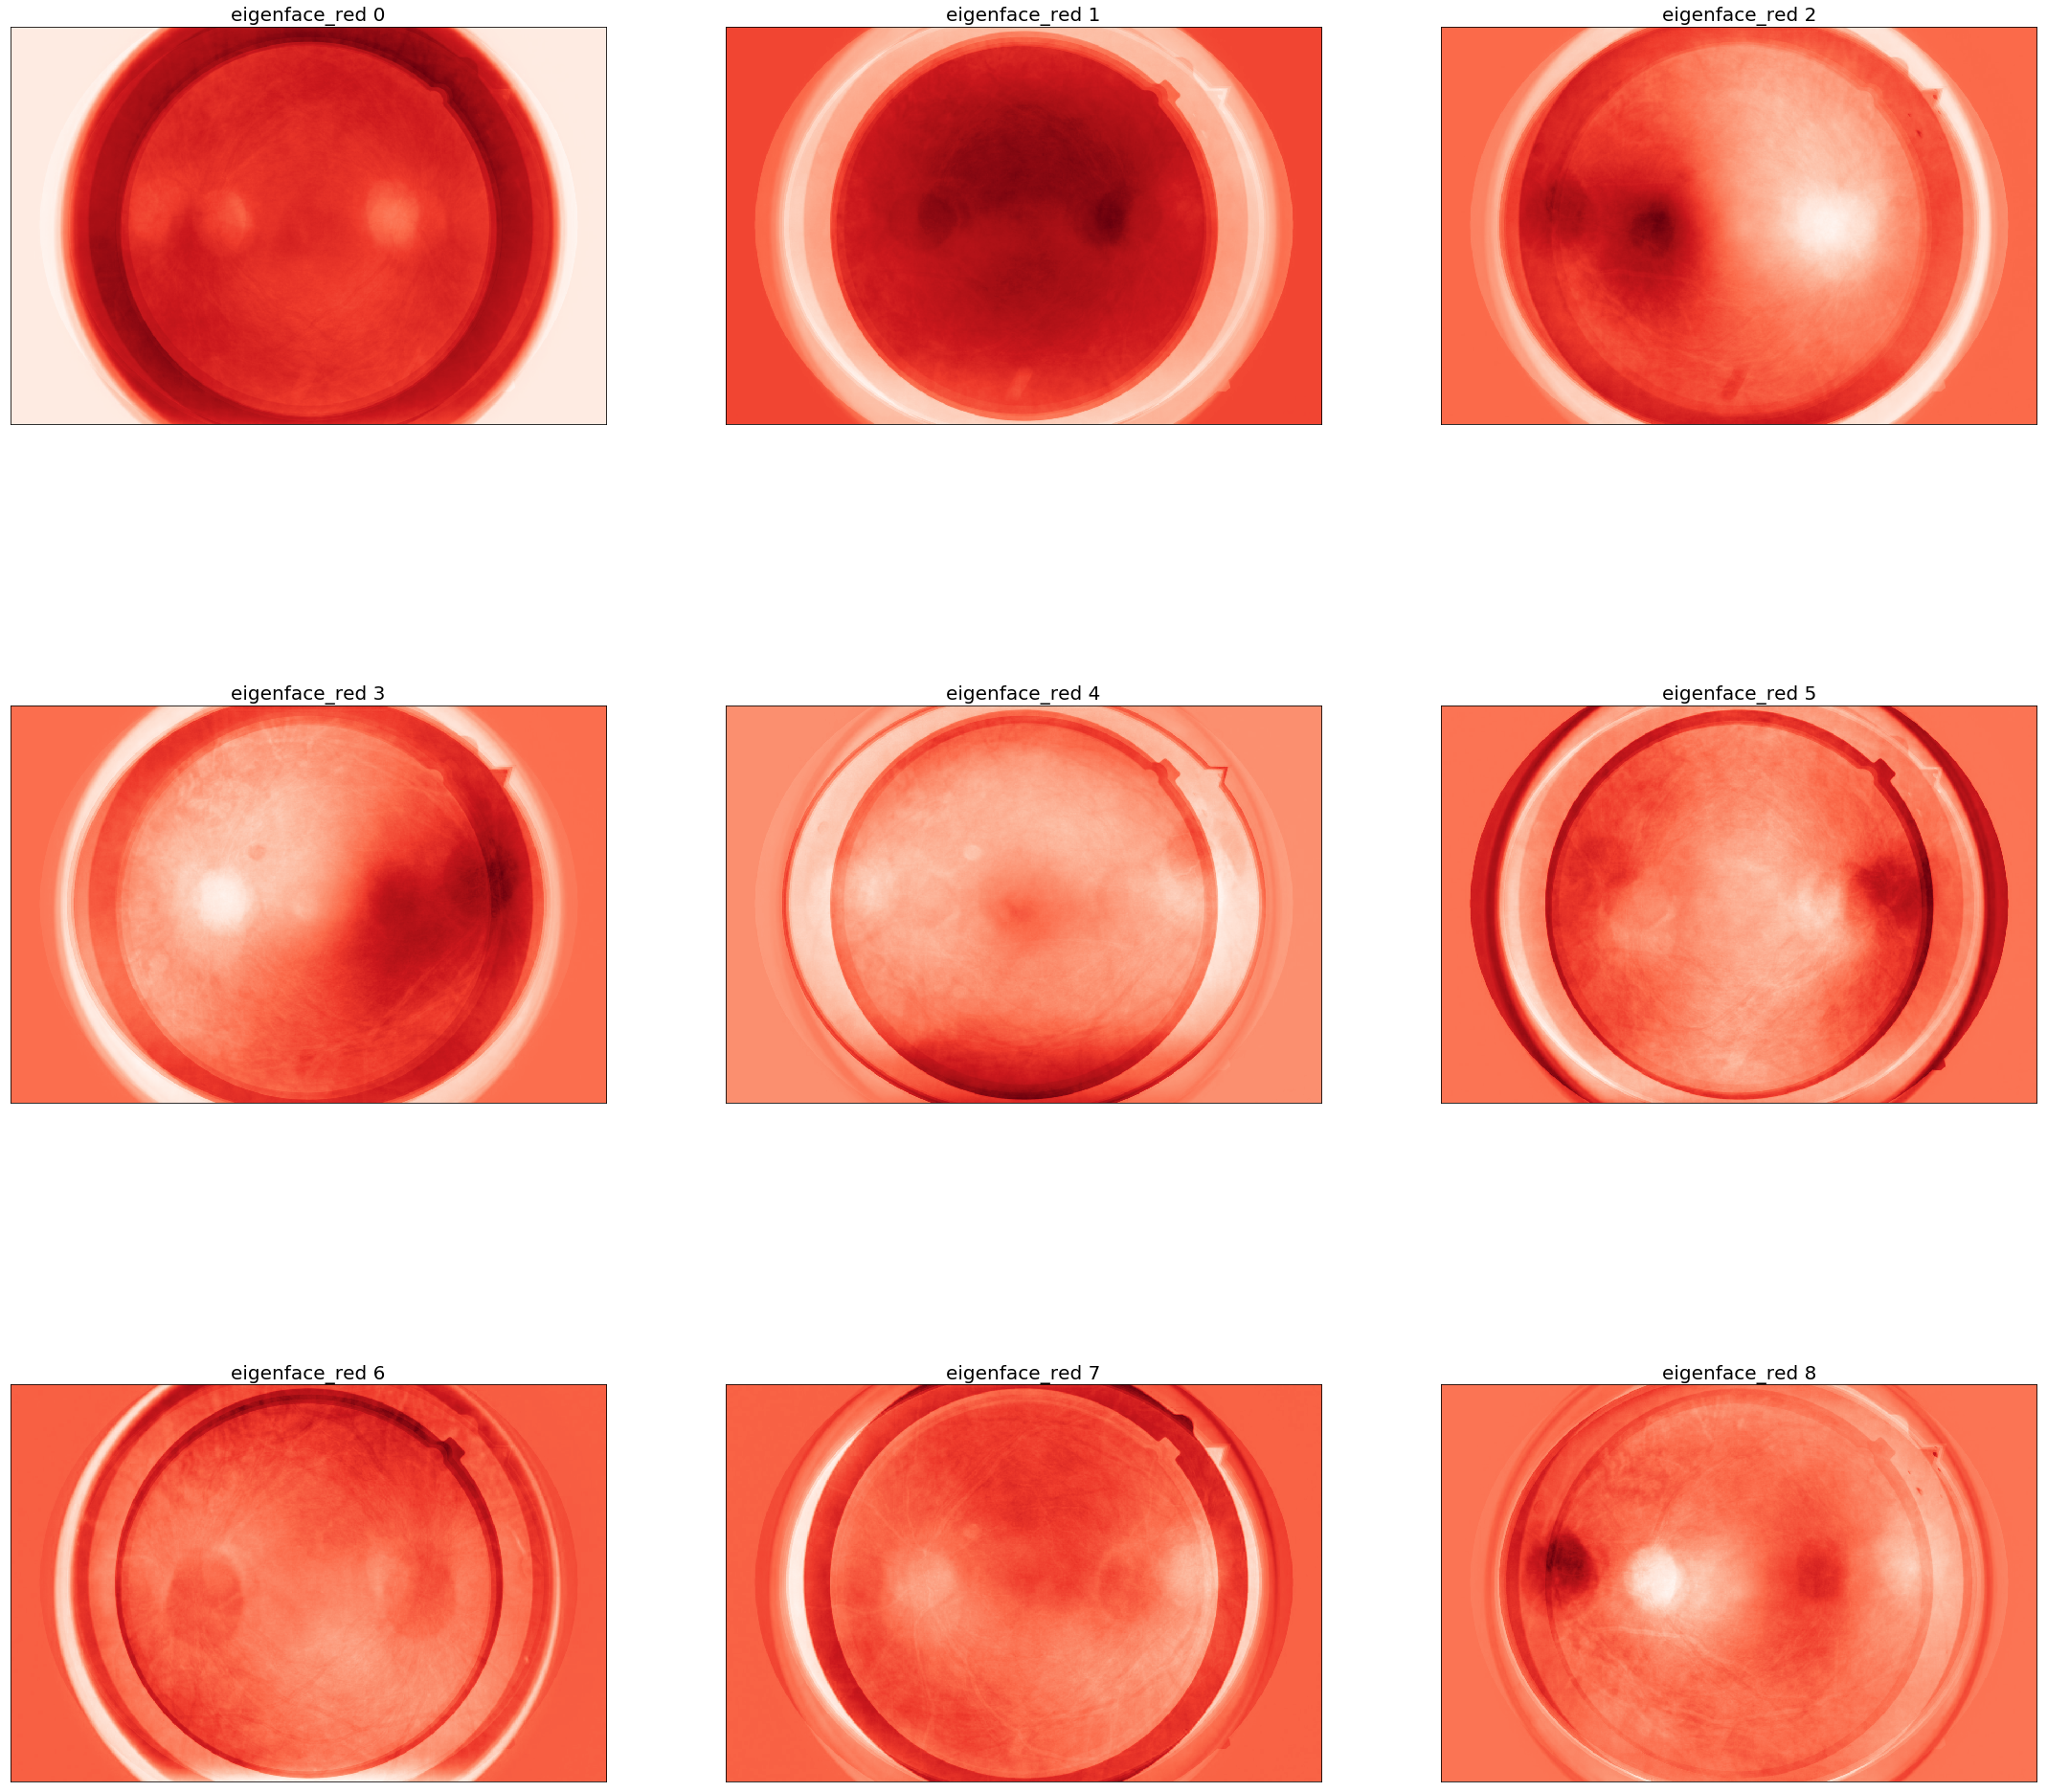

In [276]:
eigenRetinas_titles_r = ["eigenface_red %d" % i for i in range(eigenRetinas_r.shape[0])]
plot_gallery_Reds(eigenRetinas_r, eigenRetinas_titles_r, 792, 1188)

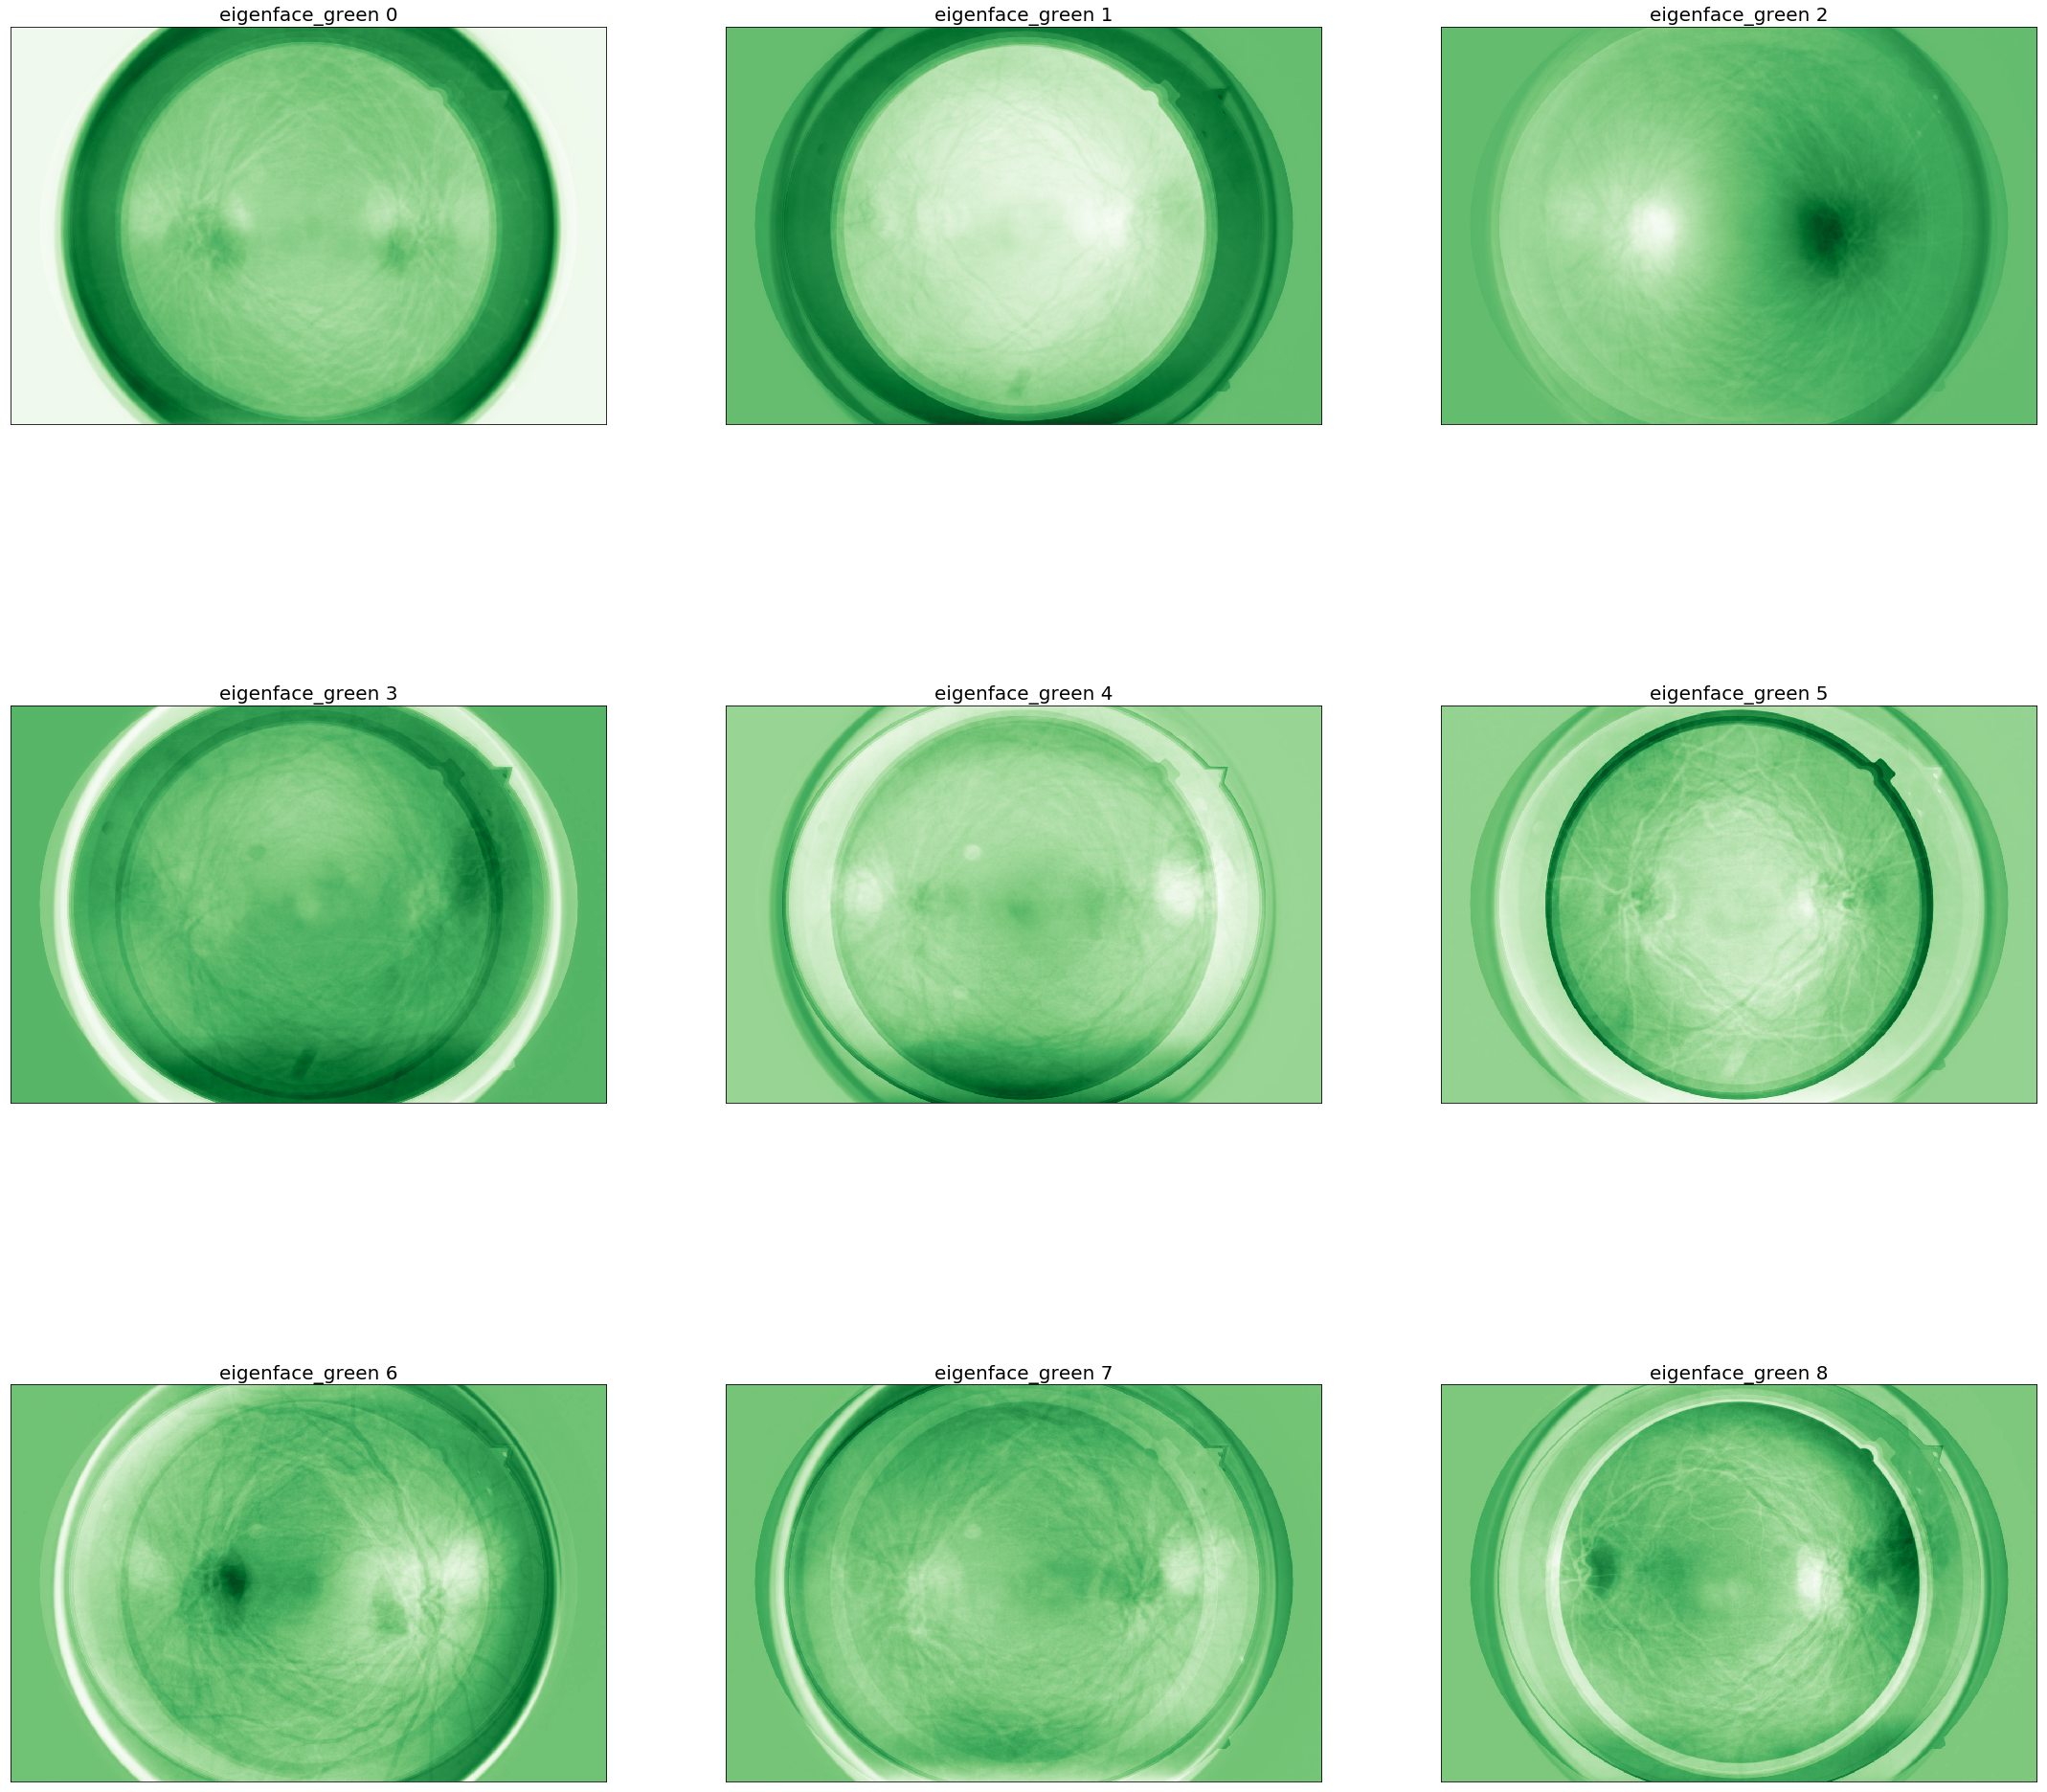

In [214]:
eigenRetinas_titles_g = ["eigenface_green %d" % i for i in range(eigenRetinas_g.shape[0])]
plot_gallery_Greens(eigenRetinas_g, eigenRetinas_titles_g, h, w)

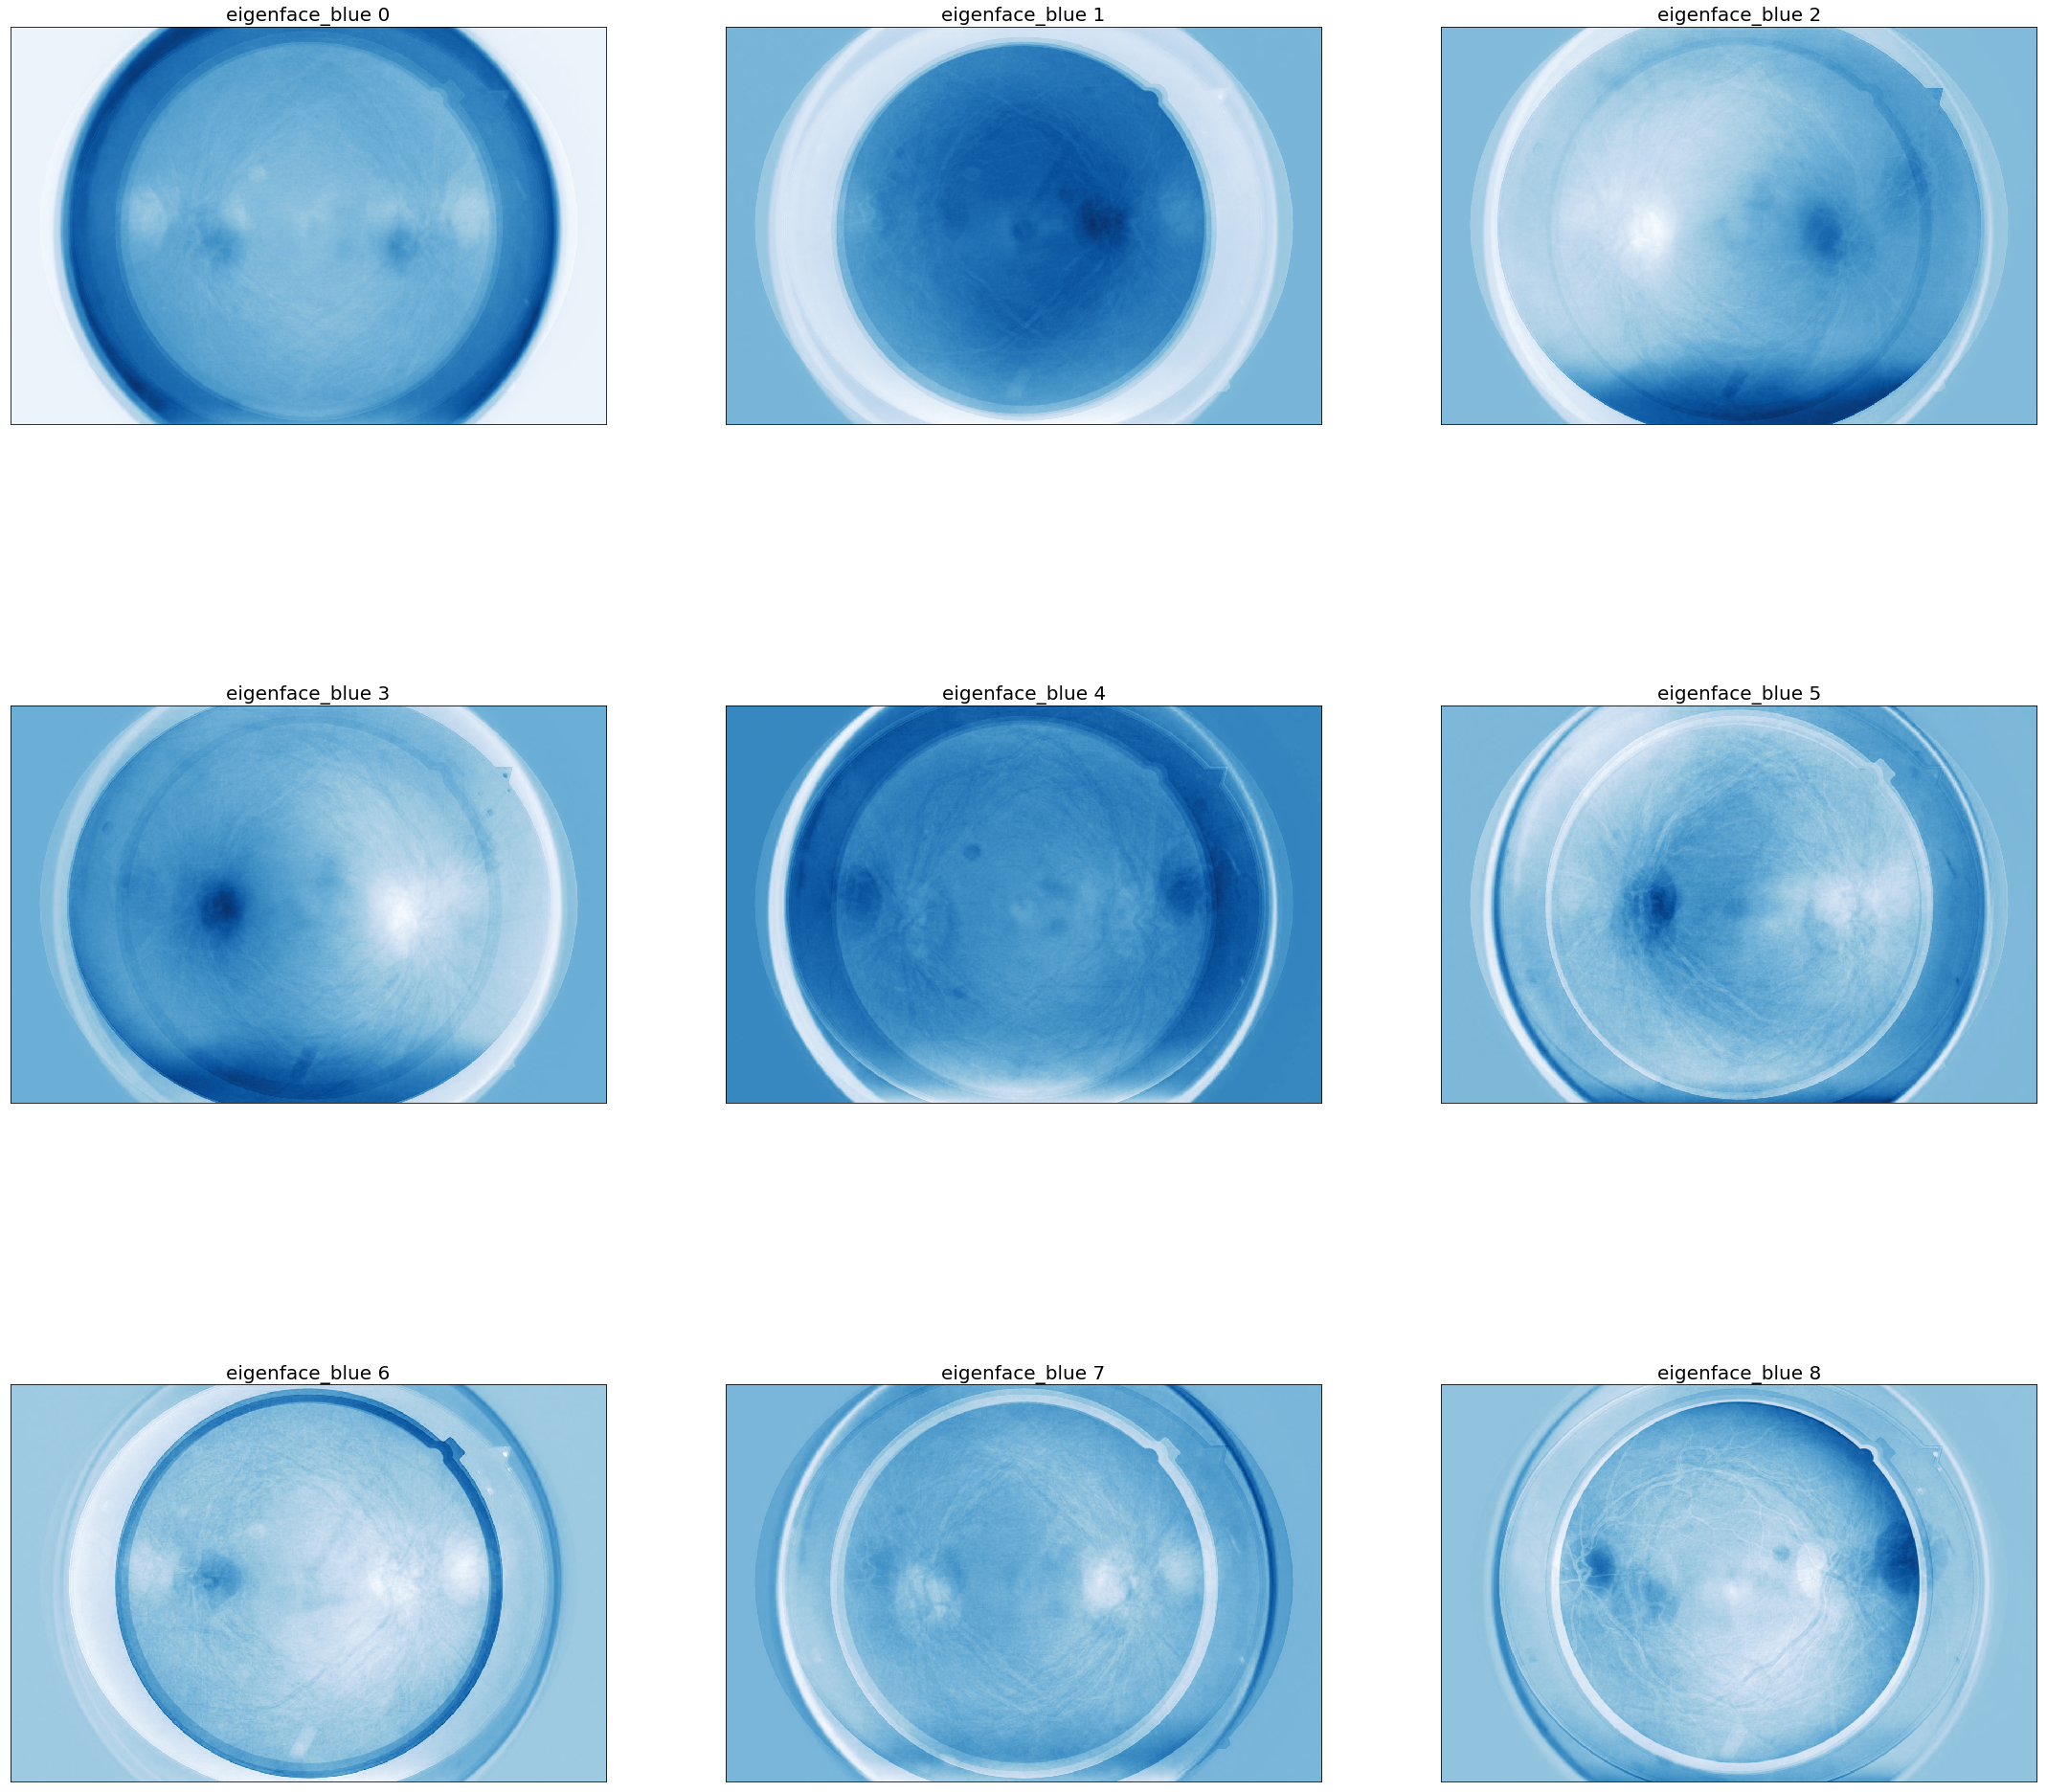

In [215]:
eigenRetinas_titles_b = ["eigenface_blue %d" % i for i in range(eigenRetinas_b.shape[0])]
plot_gallery_Blues(eigenRetinas_b, eigenRetinas_titles_b, h, w)

In [212]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
print(type(pca_r))
idx_to_reconstruct = 4    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca_r,X_idx.reshape(1, -1))

<class 'sklearn.decomposition.pca.PCA'>


ValueError: operands could not be broadcast together with shapes (1,2822688) (940896,) 

In [8]:
print(eigenfaces[0])

[[[  1.84758594e-08   2.19452142e-07   1.18964001e-07]
  [  1.84758596e-08   2.19452142e-07   1.18964001e-07]
  [  1.84758596e-08   2.19452142e-07   1.18964001e-07]
  ..., 
  [ -2.71462642e-07  -2.71462642e-07  -2.71462642e-07]
  [ -2.71462642e-07  -2.71462642e-07  -2.71462642e-07]
  [ -2.71462642e-07  -2.71462642e-07  -2.71462642e-07]]

 [[  1.84758596e-08   2.19452142e-07   1.18964001e-07]
  [  1.84758596e-08   2.19452142e-07   1.18964001e-07]
  [  1.84758596e-08   2.19452142e-07   1.18964001e-07]
  ..., 
  [ -2.71462642e-07  -2.71462642e-07  -2.71462642e-07]
  [ -2.71462642e-07  -2.71462642e-07  -2.71462642e-07]
  [ -2.71462642e-07  -2.71462642e-07  -2.71462642e-07]]

 [[  1.84758596e-08   2.19452142e-07   1.18964001e-07]
  [  1.84758596e-08   2.19452142e-07   1.18964001e-07]
  [  1.84758596e-08   2.19452142e-07   1.18964001e-07]
  ..., 
  [ -3.83800689e-07  -3.83800689e-07  -3.83800689e-07]
  [ -3.83800689e-07  -3.83800689e-07  -3.83800689e-07]
  [ -3.83800689e-07  -3.83800689e-07 

In [9]:
print(X[0])

[0 0 0 ..., 0 0 0]
